In [ ]:
import sys 
import os
import cv2
import dlib
print(sys.executable)

: 

In [1]:
# Load detektor wajah dan model landmark
detector = dlib.get_frontal_face_detector()
#predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # pastikan path-nya benar
face_predictor_path="../assets/models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(face_predictor_path)

# Baca gambar
image_path = '../assets/images/output/coba/img1.jpg'  # Ganti`` dengan path ke gambar kamu
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = detector(gray)

for face in faces:
    # Dapatkan titik-titik landmark
    landmarks = predictor(gray, face)

    # Gambar landmark di wajah
    for n in range(0, 68):  # 68 titik
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Titik hijau

# Tampilkan hasil
cv2.imshow("Landmark Wajah", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'dlib' is not defined

In [4]:
# Cek apakah file model ada
if not os.path.exists(face_predictor_path):
    print(f"ERROR: File model tidak ditemukan: {face_predictor_path}")
    exit()

predictor = dlib.shape_predictor(face_predictor_path)

# Load gambar
image_path = '../assets/images/output/coba/img1.jpg'

# Cek apakah file gambar ada
if not os.path.exists(image_path):
    print(f"ERROR: File gambar tidak ditemukan: {image_path}")
    exit()

image = cv2.imread(image_path)
if image is None:
    print(f"ERROR: Tidak bisa membaca gambar: {image_path}")
    exit()

print(f"Gambar berhasil dimuat. Ukuran: {image.shape}")

# Buat copy dari gambar asli
result_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = detector(gray)
print(f"Jumlah wajah yang terdeteksi: {len(faces)}")

if len(faces) == 0:
    print("PERINGATAN: Tidak ada wajah yang terdeteksi!")
    print("Mencoba dengan parameter yang berbeda...")
    
    # Coba deteksi dengan upsampling
    faces = detector(gray, 1)
    print(f"Jumlah wajah setelah upsampling: {len(faces)}")

for i, face in enumerate(faces):
    print(f"Memproses wajah {i+1}")
    print(f"Koordinat wajah: ({face.left()}, {face.top()}) - ({face.right()}, {face.bottom()})")
    
    # Gambar kotak di sekitar wajah
    cv2.rectangle(result_image, (face.left(), face.top()), 
                  (face.right(), face.bottom()), (0, 255, 0), 3)
    
    # Landmark di wajah
    landmarks = predictor(gray, face)
    
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        
        # Khusus mulut: warna kuning
        if 48 <= n <= 67:
            color = (0, 255, 255)  # Kuning untuk mulut
            offset_x, offset_y = 15, -15
            circle_radius = 4
            font_scale = 0.6
        else:
            color = (255, 0, 0)  # Biru untuk yang lain
            offset_x, offset_y = 10, -10
            circle_radius = 3
            font_scale = 0.5
        
        # Titik landmark
        cv2.circle(result_image, (x, y), circle_radius, color, -1)
        
        # Angka urutan
        cv2.putText(result_image, str(n + 1), (x + offset_x, y + offset_y),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, 2, cv2.LINE_AA)

# Jika tidak ada wajah terdeteksi, tampilkan gambar asli
if len(faces) == 0:
    print("Menampilkan gambar asli karena tidak ada wajah terdeteksi")
    result_image = image

print("Menampilkan hasil...")

# Resize jika gambar terlalu besar
height, width = result_image.shape[:2]
if width > 1200 or height > 800:
    scale = min(1200/width, 800/height)
    new_width = int(width * scale)
    new_height = int(height * scale)
    result_image = cv2.resize(result_image, (new_width, new_height))
    print(f"Gambar diresize ke: {new_width}x{new_height}")

# Tampilkan hasil
cv2.imshow("Facial Landmarks Debug", result_image)
print("Tekan tombol apa saja untuk menutup...")
cv2.waitKey(0)
cv2.destroyAllWindows()

Gambar berhasil dimuat. Ukuran: (480, 640, 3)
Jumlah wajah yang terdeteksi: 1
Memproses wajah 1
Koordinat wajah: (300, 176) - (424, 300)
Menampilkan hasil...
Tekan tombol apa saja untuk menutup...


In [4]:
# import os
# import cv2
# import shutil

# # Path untuk video dan output
# video_path = 'dataset/video/05_EP03_06.avi'
# output_folder = 'dataset/casme_baru/Suprise/05_EP03_06'

# # Buat folder output jika belum ada
# os.makedirs(output_folder, exist_ok=True)

# # Buka video menggunakan OpenCV
# vidcap = cv2.VideoCapture(video_path)

# # Ambil frame rate dari video
# framePerSecond = vidcap.get(cv2.CAP_PROP_FPS)

# # Variabel untuk menghitung nomor frame
# count = 1

# while vidcap.isOpened():
#     success, image = vidcap.read()  # Baca frame
#     if not success:
#         break  # Jika tidak ada frame yang dibaca, keluar dari loop

#     # Simpan gambar ke folder output dengan nama imgX.jpg
#     img_name = f'img{count}.jpg'
#     img_path = os.path.join(output_folder, img_name)
#     cv2.imwrite(img_path, image)  # Simpan gambar

#     # print(f'Saved frame {count} to {img_path}')

#     count += 1

# # Lepas video setelah selesai
# vidcap.release()
# print(f"Extraction complete, saved {count-1} frames to {output_folder}")

import os
import cv2
import shutil

# Path utama
base_input_folder = 'dataset/training'
base_output_folder = 'dataset/training_images'

# Bersihkan folder output jika ada
if os.path.exists(base_output_folder):
    shutil.rmtree(base_output_folder)

# Loop melalui folder dan file dalam folder input
for folder1 in os.listdir(base_input_folder):
    folder1_path = os.path.join(base_input_folder, folder1)
    
    print(f"Memeriksa folder1: {folder1_path}")
    
    if os.path.isdir(folder1_path):
        for filename in os.listdir(folder1_path):
            file_path = os.path.join(folder1_path, filename)
            
            # Cek apakah file adalah file .mp4
            if filename.lower().endswith('.avi') and os.path.isfile(file_path):
                print(f"Menemukan file .avi: {file_path}")

                # Buat folder output sesuai nama folder
                output_folder = os.path.join(base_output_folder, folder1, filename[:-4])  # Hapus ekstensi '.avi' dari nama folder
                os.makedirs(output_folder, exist_ok=True)

                # Buka video menggunakan OpenCV
                vidcap = cv2.VideoCapture(file_path)

                # Ambil frame rate dari video
                framePerSecond = vidcap.get(cv2.CAP_PROP_FPS)

                # Variabel untuk menghitung nomor frame
                count = 1

                while vidcap.isOpened():
                    success, image = vidcap.read()  # Baca frame
                    if not success:
                        break  # Jika tidak ada frame yang dibaca, keluar dari loop

                    # Simpan gambar ke folder output dengan nama imgX.jpg
                    img_name = f'img{count}.jpg'
                    img_path = os.path.join(output_folder, img_name)
                    cv2.imwrite(img_path, image)  # Simpan gambar

                    count += 1

                # Lepas video setelah selesai
                vidcap.release()
                print(f"Extraction complete for {filename}, saved {count-1} frames to {output_folder}")


Memeriksa folder1: dataset/training\rendah
Menemukan file .avi: dataset/training\rendah\20241209090801.avi
Extraction complete for 20241209090801.avi, saved 3071 frames to dataset/training_images\rendah\20241209090801
Menemukan file .avi: dataset/training\rendah\20241209091213.avi
Extraction complete for 20241209091213.avi, saved 2592 frames to dataset/training_images\rendah\20241209091213
Menemukan file .avi: dataset/training\rendah\20241209091346.avi
Extraction complete for 20241209091346.avi, saved 2648 frames to dataset/training_images\rendah\20241209091346
Menemukan file .avi: dataset/training\rendah\20241212095816.avi
Extraction complete for 20241212095816.avi, saved 2668 frames to dataset/training_images\rendah\20241212095816
Menemukan file .avi: dataset/training\rendah\20241212100720.avi
Extraction complete for 20241212100720.avi, saved 2620 frames to dataset/training_images\rendah\20241212100720
Memeriksa folder1: dataset/training\sangat_rendah
Menemukan file .avi: dataset/tra

Pemecahan video menjadi 1 detik

In [7]:
from moviepy.editor import VideoFileClip
import os

def split_video_by_seconds(input_video, output_folder="output"):
    # Membuat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Membaca file video
    clip = VideoFileClip(input_video)
    
    # Mendapatkan durasi video
    duration = int(clip.duration)
    print(f"Durasi video: {duration} detik")
    
    # Memecah video menjadi potongan 1 detik
    for i in range(duration):
        start_time = i
        end_time = i + 1
        
        # Memotong video
        new_clip = clip.subclip(start_time, end_time)
        
        # Menyimpan potongan video
        output_path = os.path.join(output_folder, f"second_{i+1}.mp4")
        new_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")
        
        print(f"Potongan detik ke-{i+1} disimpan ke {output_path}")
    
    # Menutup video
    clip.close()
    
    print("Pemecahan video selesai!")

# Contoh penggunaan
if __name__ == "__main__":
    input_video = "dataset/training_images/alfina salsabila.mp4"  # Ganti dengan nama file video Anda
    split_video_by_seconds(input_video)

Durasi video: 10 detik
Moviepy - Building video output\second_1.mp4.
Moviepy - Writing video output\second_1.mp4



Moviepy - Done !
Moviepy - video ready output\second_1.mp4
Potongan detik ke-1 disimpan ke output\second_1.mp4
Moviepy - Building video output\second_2.mp4.
Moviepy - Writing video output\second_2.mp4



Moviepy - Done !
Moviepy - video ready output\second_2.mp4
Potongan detik ke-2 disimpan ke output\second_2.mp4
Moviepy - Building video output\second_3.mp4.
Moviepy - Writing video output\second_3.mp4



Moviepy - Done !
Moviepy - video ready output\second_3.mp4
Potongan detik ke-3 disimpan ke output\second_3.mp4
Moviepy - Building video output\second_4.mp4.
Moviepy - Writing video output\second_4.mp4



Moviepy - Done !
Moviepy - video ready output\second_4.mp4
Potongan detik ke-4 disimpan ke output\second_4.mp4
Moviepy - Building video output\second_5.mp4.
Moviepy - Writing video output\second_5.mp4



Moviepy - Done !
Moviepy - video ready output\second_5.mp4
Potongan detik ke-5 disimpan ke output\second_5.mp4
Moviepy - Building video output\second_6.mp4.
Moviepy - Writing video output\second_6.mp4



Moviepy - Done !
Moviepy - video ready output\second_6.mp4
Potongan detik ke-6 disimpan ke output\second_6.mp4
Moviepy - Building video output\second_7.mp4.
Moviepy - Writing video output\second_7.mp4



Moviepy - Done !
Moviepy - video ready output\second_7.mp4
Potongan detik ke-7 disimpan ke output\second_7.mp4
Moviepy - Building video output\second_8.mp4.
Moviepy - Writing video output\second_8.mp4



Moviepy - Done !
Moviepy - video ready output\second_8.mp4
Potongan detik ke-8 disimpan ke output\second_8.mp4
Moviepy - Building video output\second_9.mp4.
Moviepy - Writing video output\second_9.mp4



Moviepy - Done !
Moviepy - video ready output\second_9.mp4
Potongan detik ke-9 disimpan ke output\second_9.mp4
Moviepy - Building video output\second_10.mp4.
Moviepy - Writing video output\second_10.mp4



Moviepy - Done !
Moviepy - video ready output\second_10.mp4
Potongan detik ke-10 disimpan ke output\second_10.mp4
Pemecahan video selesai!


In [2]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tabulate import tabulate
import pandas as pd
import shutil
np.set_printoptions(threshold=np.inf)


deteksi pengambilan area mulut

In [ ]:
#code untuk deteksi area mulut
import cv2 #membaca, mengubah dan menyimpan gambar
import numpy as np #operasi array jika dibutuhkan
import dlib #deteksi wajah dan landmark
import os #operasi file dan sistem
import sys

def extract_mouth_region(image_path, face_predictor_path="../assets/models/shape_predictor_68_face_landmarks.dat", padding_x=10, padding_y=10, target_size=(70, 35)): #mengambil dan memotong area mulut dari wajah
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File tidak ditemukan: {image_path}")
    
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Tidak dapat membaca gambar dari {image_path}")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if not os.path.exists(face_predictor_path):
        raise FileNotFoundError(f"File predictor tidak ditemukan: {face_predictor_path}")

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(face_predictor_path)

    faces = detector(gray)
    if len(faces) == 0:
        raise ValueError("Tidak ada wajah yang terdeteksi dalam gambar")

    face = faces[0]
    landmarks = predictor(gray, face)
    landmarks_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    mouth_points = landmarks_points[48:68] #titik mulut
    x_coordinates = [p[0] for p in mouth_points]
    y_coordinates = [p[1] for p in mouth_points]

    left = max(0, min(x_coordinates) - padding_x)
    top = max(0, min(y_coordinates) - padding_y)
    right = min(image.shape[1], max(x_coordinates) + padding_x)
    bottom = min(image.shape[0], max(y_coordinates) + padding_y)

    mouth_region = image[top:bottom, left:right]
    mouth_region_resized = cv2.resize(mouth_region, target_size)
    return mouth_region_resized, (left, top, right, bottom)

paths = { #pengaturan direktori
    "base_dataset_input": "services/backend/assets/images/output/coba",  # Path baru
    "result_dataset": "output-baru",
    "mouth_output": "mouth_regions"
}

categories = ["tinggi", "rendah", "sangat_tinggi", "sangat_rendah"]

def ensure_directory(path): #cek apakah folder ada? jika tidak maka buat otomatis
    if not os.path.exists(path):
        os.makedirs(path)
#1. bagian main (kode utama)
if __name__ == "__main__":
    # Verify base paths exist
    if not os.path.exists(paths["base_path_dataset"]):
        print(f"ERROR: Base dataset path not found: {paths['base_path_dataset']}")
        sys.exit(1)

    if not os.path.exists(paths["base_dataset_input"]):
        print(f"ERROR: Input images path not found: {paths['base_dataset_input']}")
        sys.exit(1)
    
    # pastikan direktori outputnya
    output_base_dir = os.path.join(paths["result_dataset"], paths["mouth_output"])
    ensure_directory(output_base_dir)

    # Cek kategori
    category_paths = {}
    for category in categories:
        category_path = os.path.join(paths["base_dataset_input"], category)
        if os.path.exists(category_path):
            category_paths[category] = category_path
            # Ensure output directory for this category exists
            ensure_directory(os.path.join(output_base_dir, category))
        else:
            print(f"WARNING: Category folder not found: {category_path}")

    if not category_paths:
        print("ERROR: No valid category folders found!")
        sys.exit(1)

    face_predictor_path = "models/shape_predictor_68_face_landmarks.dat"
    if not os.path.exists(face_predictor_path):
        print(f"ERROR: Face predictor file not found: {face_predictor_path}")
        sys.exit(1)

    def process_all_images():
        total_images = 0
        processed_count = 0
        error_count = 0
        
        print("\n=== Processing all images in all categories ===")
        
        # Process masing-masing category
        for category, category_path in category_paths.items():
            print(f"\n--- Processing category: {category} ---")
            category_output_dir = os.path.join(output_base_dir, category)
            
            # ambil semua gambar dari semua folder dalam kategori
            image_files = []
            person_folders = []
            
            # pemindaian pertama untuk identifikasi semua folder orang
            for item in os.listdir(category_path):
                person_dir = os.path.join(category_path, item)
                if os.path.isdir(person_dir):
                    person_folders.append(person_dir)
            
            if person_folders:
                print(f"Found {len(person_folders)} person folders in {category}")
            else:
                print(f"No person folders found in {category}, scanning for images directly")
                
            # Process gambar di semua folder
            for root, _, files in os.walk(category_path):
                for file in files:
                    if file.lower().endswith((".png", ".jpg", ".jpeg")):
                        image_files.append(os.path.join(root, file))
            
            total_images += len(image_files)
            print(f"Found {len(image_files)} total images in {category}")
            
            # Process masing2 image
            for i, image_path in enumerate(image_files):
                # pertahankan struktur folder orang dalam output
                rel_path = os.path.relpath(os.path.dirname(image_path), category_path)
                if rel_path != '.':
                    person_output_dir = os.path.join(category_output_dir, rel_path)
                    ensure_directory(person_output_dir)
                else:
                    person_output_dir = category_output_dir
                
                filename = os.path.basename(image_path)
                output_filename = f"mouth_{os.path.splitext(filename)[0]}.jpg"
                output_path = os.path.join(person_output_dir, output_filename)
                
                print(f"Processing ({i+1}/{len(image_files)}): {rel_path}/{filename}", end='... ')
                
                try:
                    mouth_region, _ = extract_mouth_region(image_path, face_predictor_path)
                    if cv2.imwrite(output_path, mouth_region):
                        processed_count += 1
                        print("Success")
                    else:
                        print("Failed to save")
                        error_count += 1
                except Exception as e:
                    print(f"Error: {str(e)}")
                    error_count += 1
        
        print(f"\nProcessing summary:")
        print(f"- Total images found: {total_images}")
        print(f"- Successfully processed: {processed_count}")
        print(f"- Errors: {error_count}")
        
        return processed_count, error_count

    # eksekusi proses ekstraksi untuk semua gambar secara langsung saat file dijalankan.
    try:
        process_all_images()
        print("\nProcessing completed. All available images have been processed.")
    except Exception as e:
        print(f"\nFatal error during processing: {str(e)}")
        print("Program terminated.")

ModuleNotFoundError: No module named 'cv2'

deteksi area alis 1 folder

In [ ]:
#code untuk deteksi area alis
import cv2 #baca, olah dan simpan gambar
import numpy as np
import dlib #deteksi wajah dan landmark
import os # operasi file dan sistem
import sys

def extract_eyebrows_region(image_path, face_predictor_path="models/shape_predictor_68_face_landmarks.dat", padding_x=5, padding_y=2, target_size=(100, 20)): #ambil titik alisnya dan resize ukurannya
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File tidak ditemukan: {image_path}")
    
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Tidak dapat membaca gambar dari {image_path}")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if not os.path.exists(face_predictor_path):
        raise FileNotFoundError(f"File predictor tidak ditemukan: {face_predictor_path}")

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(face_predictor_path)

    faces = detector(gray)
    if len(faces) == 0:
        raise ValueError("Tidak ada wajah yang terdeteksi dalam gambar")

    face = faces[0]
    landmarks = predictor(gray, face)
    landmarks_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    # Indeks landmark untuk alis:
    # - Alis kiri: 17-21
    # - Alis kanan: 22-26
    eyebrows_points = landmarks_points[17:27]  # Mengambil kedua alis
    
    # Indeks landmark untuk mata:
    # - Mata kiri: 36-41
    # - Mata kanan: 42-47
    left_eye_points = landmarks_points[36:42]
    right_eye_points = landmarks_points[42:48]
    
    # Ambil koordinat alis
    x_coordinates = [p[0] for p in eyebrows_points]
    y_coordinates = [p[1] for p in eyebrows_points]
    
    # Ambil koordinat mata untuk batasan bawah
    eye_y_top = min([p[1] for p in left_eye_points + right_eye_points])
    
    left = max(0, min(x_coordinates) - padding_x)
    top = max(0, min(y_coordinates) - padding_y)
    right = min(image.shape[1], max(x_coordinates) + padding_x)
    
    # Pastikan bottom tidak melewati mata
    # Kita gunakan nilai mata bagian atas sebagai batas
    bottom = min(eye_y_top - 2, max(y_coordinates) + padding_y)

    eyebrows_region = image[top:bottom, left:right]
    eyebrows_region_resized = cv2.resize(eyebrows_region, target_size)
    
    return eyebrows_region_resized, (left, top, right, bottom)

def ensure_directory(path):
    """
    Memastikan direktori ada, jika tidak ada akan dibuat
    """
    if not os.path.exists(path):
        os.makedirs(path)

def process_all_images(base_input_dir, base_output_dir, face_predictor_path): # fungsi utama untuk memproses semua gambar dari semua kategori
    # Validasi path predictor
    if not os.path.exists(face_predictor_path):
        print(f"ERROR: Face predictor file not found: {face_predictor_path}")
        return False
    
    # Pastikan output direktori utama ada
    ensure_directory(base_output_dir)
    
    # Cek apakah direktori input ada
    if not os.path.exists(base_input_dir):
        print(f"ERROR: Input directory not found: {base_input_dir}")
        return False
    
    # Daftar kategori yang diharapkan
    categories = ["Rendah", "Sangat Rendah", "Tinggi", "Sangat Tinggi"]
    
    total_images = 0
    processed_count = 0
    error_count = 0
    
    # Proses masing-masing kategori
    for category in categories:
        category_input_path = os.path.join(base_input_dir, category)
        category_output_path = os.path.join(base_output_dir, category)
        
        if not os.path.exists(category_input_path):
            print(f"WARNING: Category folder not found: {category_input_path}")
            continue
        
        # Pastikan output direktori kategori ada
        ensure_directory(category_output_path)
        
        print(f"\n--- Processing category: {category} ---")
        
        # Kumpulkan semua file gambar dalam kategori ini (termasuk subfolder)
        image_files = []
        for root, _, files in os.walk(category_input_path):
            for file in files:
                if file.lower().endswith((".png", ".jpg", ".jpeg")):
                    image_files.append(os.path.join(root, file))
        
        total_images += len(image_files)
        print(f"Found {len(image_files)} images in {category}")
        
        # Proses setiap gambar
        for i, image_path in enumerate(image_files):
            # Pertahankan struktur folder dalam output
            rel_path = os.path.relpath(os.path.dirname(image_path), category_input_path)
            
            if rel_path != '.':
                person_output_dir = os.path.join(category_output_path, rel_path)
                ensure_directory(person_output_dir)
            else:
                person_output_dir = category_output_path
            
            filename = os.path.basename(image_path)
            output_filename = f"eyebrows_{os.path.splitext(filename)[0]}.jpg"
            output_path = os.path.join(person_output_dir, output_filename)
            
            # Format output yang ringkas
            print(f"Processing [{category}] ({i+1}/{len(image_files)}): {rel_path}/{filename}", end="... ")
            
            try:
                # Ekstrak alis
                eyebrows_region, _ = extract_eyebrows_region(image_path, face_predictor_path)
                
                # Simpan hasil
                if cv2.imwrite(output_path, eyebrows_region):
                    processed_count += 1
                    print("OK")
                else:
                    print("Failed to save")
                    error_count += 1
            except Exception as e:
                print(f"Error: {str(e)}")
                error_count += 1
    
    # Tampilkan ringkasan
    print(f"\nProcessing summary:")
    print(f"- Total images found: {total_images}")
    print(f"- Successfully processed: {processed_count}")
    print(f"- Errors: {error_count}")
    
    return True

if __name__ == "__main__": # fungsi utama awal program dijalankan
    # Path utama
    base_input_dir = "dataset/training_images"
    base_output_dir = "output-baru/eyebrows_regions"
    face_predictor_path = "models/shape_predictor_68_face_landmarks.dat"
    
    try:
        print(f"Memulai proses ekstraksi alis dari folder: {base_input_dir}")
        print(f"Hasil akan disimpan di: {base_output_dir}")
        
        # Proses semua gambar
        if process_all_images(base_input_dir, base_output_dir, face_predictor_path):
            print("\nProses selesai!")
        else:
            print("\nProses dihentikan karena terjadi kesalahan.")
    except Exception as e:
        print(f"\nFatal error: {str(e)}")
        print("Program dihentikan.")

Memulai proses ekstraksi alis dari folder: dataset/training_images
Hasil akan disimpan di: output-baru/eyebrows_regions

--- Processing category: Rendah ---
Found 4160 images in Rendah
Processing [Rendah] (1/4160): Dany Fatihul Ihsan_clip1/img1.jpg... OK
Processing [Rendah] (2/4160): Dany Fatihul Ihsan_clip1/img10.jpg... OK
Processing [Rendah] (3/4160): Dany Fatihul Ihsan_clip1/img100.jpg... OK
Processing [Rendah] (4/4160): Dany Fatihul Ihsan_clip1/img101.jpg... OK
Processing [Rendah] (5/4160): Dany Fatihul Ihsan_clip1/img102.jpg... OK
Processing [Rendah] (6/4160): Dany Fatihul Ihsan_clip1/img103.jpg... OK
Processing [Rendah] (7/4160): Dany Fatihul Ihsan_clip1/img104.jpg... OK
Processing [Rendah] (8/4160): Dany Fatihul Ihsan_clip1/img105.jpg... OK
Processing [Rendah] (9/4160): Dany Fatihul Ihsan_clip1/img106.jpg... OK
Processing [Rendah] (10/4160): Dany Fatihul Ihsan_clip1/img107.jpg... OK
Processing [Rendah] (11/4160): Dany Fatihul Ihsan_clip1/img108.jpg... OK
Processing [Rendah] (12/

code untuk import nilai ke csv dan excel

In [ ]:
# Import module yang digunakan data anxiety
# ekstraksi fitur gerakan wajah dari serangkaian frame gambar, hitung perubahan antar frame dengan POC
import os
import cv2 # gambar dan video
import shutil # file handling
import numpy as np # proses numerik
import pandas as pd # manipulasi data tabular
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from feature_extraction.poc import POC # menghitung perubahan gerakan antar frame
from feature_extraction.vektor import Vektor # menghitung arah dan panjang vektor
from feature_extraction.quadran import Quadran # menghitung karakteristik gerakan (arah, sudut)

def natural_sort_key(s): # mengurutkan nama file dengan benar
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

# Inisialisasi variabel untuk path url dan blok size
blockSize = 7 #variabel yg menentukan ukuran blok untuk POC, digunakan untuk perbandingan analisis dalam gerakan
pathDirectory = { # path dataset dan output
    "base_path_dataset": "dataset",
    "result_dataset": "output-baru", 
    "mouth_regions": "output-baru/mouth_regions",
    "eyebrows_regions": "output-baru/eyebrows_regions"
}

# Mapping komponen untuk mengakses folder yang sesuai
components_mapping = { # komponen wajah yang digunakan
    'mulut': pathDirectory['mouth_regions'],
    'alis': pathDirectory['eyebrows_regions']
}

# Inisialisasi variabel untuk menyimpan data dari masing-masing komponen
frames_data = {component_name: [] for component_name in components_mapping} #dictionary untuk menyimpan data fitur yang diekstraksi untuk setiap komponen
index = {component_name: 0 for component_name in components_mapping} # menyimpan urutan frame per komponen

# Membuat direktori jika belum ada untuk outputnya
output_csv_dir = os.path.join(pathDirectory['result_dataset'], 'csv')
output_excel_dir = os.path.join(pathDirectory['result_dataset'], 'excel')
os.makedirs(output_csv_dir, exist_ok=True)
os.makedirs(output_excel_dir, exist_ok=True)

# Hapus file output dari semua tipe dataset baik csv dan xlsx jika ada (Nilai fitur)
for component_name in components_mapping:
    csv_file_path = os.path.join(output_csv_dir, f'{component_name}.csv')
    xlsx_file_path = os.path.join(output_excel_dir, f'{component_name}.xlsx')
    if os.path.exists(csv_file_path):
        os.remove(csv_file_path)
    if os.path.exists(xlsx_file_path):
        os.remove(xlsx_file_path)

# Proses untuk setiap jenis komponen (mulut dan alis)
for component_name, component_path in components_mapping.items():
    print(f"Memproses komponen: {component_name}")
    
    # Inisialisasi untuk komponen ini
    data_blocks_first_image = None
    index[component_name] = 0
    
    # Temukan semua folder label di dalam path komponen
    for label_folder in os.listdir(component_path):
        label_folder_path = os.path.join(component_path, label_folder)
        if not os.path.isdir(label_folder_path):
            continue
            
        print(f"Memproses label: {label_folder}")
        
        # Temukan semua folder subjek di dalam folder label
        for subject_folder in os.listdir(label_folder_path):
            subject_folder_path = os.path.join(label_folder_path, subject_folder)
            if not os.path.isdir(subject_folder_path):
                continue
                
            print(f"Memproses subjek: {subject_folder}")
            
            # Reset data frame pertama untuk setiap subjek baru
            data_blocks_first_image = None
            index[component_name] = 0
            
            # Baca semua gambar di folder subjek secara berurutan
            images_files = sorted([f for f in os.listdir(subject_folder_path) 
                                 if f.endswith(".jpg") or f.endswith(".png")], 
                                key=natural_sort_key)
            
            for filename in images_files:
                image_path = os.path.join(subject_folder_path, filename)
                
                # Baca gambar
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Gagal membaca gambar: {image_path}")
                    continue
                
                # Convert image ke grayscale jika belum
                if len(image.shape) == 3:
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                else:
                    gray_image = image
                
                # Buat variabel frame_data untuk menampung data current frame
                frame_data = {'Frame': f"{index[component_name] + 1}({filename.split('.')[0]})"}
                
                # Proses gambar sebagai blok data
                # Karena gambar sudah di-crop sebelumnya, kita gunakan gambar langsung
                data_blocks_image_current = gray_image
                
                # Jika ini frame pertama, simpan sebagai referensi
                if data_blocks_first_image is None:
                    # menambahkan data frame ke list frames_data sesuai dengan component_name
                    frames_data[component_name].append(frame_data)
                    # Tambahkan kolom "Folder Path" dengan nilai folder saat ini
                    frame_data['Folder Path'] = subject_folder
                    # Tambahkan kolom "Label" dengan nilai label saat ini
                    frame_data['Label'] = label_folder
                    # Set value data_blocks_first_image ke data_blocks_image_current
                    data_blocks_first_image = data_blocks_image_current
                    # Tambahkan index untuk frame berikutnya
                    index[component_name] += 1
                    continue
                
                # Inisiasi class POC
                initPOC = POC(data_blocks_first_image, data_blocks_image_current, blockSize) 
                # Pemanggilan fungsi pocCalc() untuk menghitung nilai POC disetiap gambar
                valPOC = initPOC.getPOC() 
                
                # Pemanggilan class dan method untuk menampilkan quiver / gambar panah
                initQuiv = Vektor(valPOC, blockSize)
                quivData = initQuiv.getVektor() 
                
                # Pemanggilan class untuk mengeluarkan nilai karakteristik vektor
                initQuadran = Quadran(quivData) 
                quadran = initQuadran.getQuadran()
                
                # Update frame_data dengan data quadran
                for i, quad in enumerate(quadran):
                    # Set data kedalam frame_data sesuai column nya
                    frame_data[f'X{i+1}'] = quad[1] # perpindahan horizontal
                    frame_data[f'Y{i+1}'] = quad[2] #perpindahan vertikal
                    frame_data[f'Tetha{i+1}'] = quad[3] #sudut gerakan
                    frame_data[f'Magnitude{i+1}'] = quad[4] #kekuatan gerakan
                
                # Menambahkan data frame ke list
                frames_data[component_name].append(frame_data)
                # Tambahkan kolom "Folder Path" dengan nilai folder saat ini
                frame_data['Folder Path'] = subject_folder
                # Tambahkan kolom "Label" dengan nilai label saat ini
                frame_data['Label'] = label_folder
                
                # Tambahkan index untuk frame berikutnya
                index[component_name] += 1

# Export dataframe ke dalam file csv dan xlsx sesuai dengan masing-masing component untuk fitur ekstrasi biasa
for component_name, data_frame in frames_data.items():
    # Initialisasi dataframe dengan pandas
    df = pd.DataFrame(data_frame)
    
    # Simpan ke file CSV
    nama_file_csv = f'{output_csv_dir}/{component_name}.csv'
    df.to_csv(nama_file_csv, index=False, float_format=None)
    
    # Simpan ke file Excel
    nama_file_xlsx = f'{output_excel_dir}/{component_name}.xlsx'
    df.to_excel(nama_file_xlsx, index=False, float_format=None)

# Export dataframe untuk semua komponen digabung
frames_data_all_components = []

# Gabungkan semua data frame dari semua komponen
for component_name, data_frames in frames_data.items():
    for i, frame in enumerate(data_frames):
        if i >= len(frames_data_all_components):
            frames_data_all_components.append({})
        
        # Tambahkan prefix nama komponen ke nama kolom
        for key, value in frame.items():
            if key not in ['Frame', 'Folder Path', 'Label']:
                frames_data_all_components[i][f'{component_name}-{key}'] = value
            else:
                frames_data_all_components[i][key] = value

# Initialisasi dataframe dengan pandas untuk semua komponen
df_all = pd.DataFrame(frames_data_all_components)

# Inisialisasi nama file untuk dataset semua komponen
nama_file_csv = f'{output_csv_dir}/nilai-fitur-all-component-anxiety.csv'
nama_file_xlsx = f'{output_excel_dir}/nilai-fitur-all-component-anxiety.xlsx'

# Hapus file output jika sudah ada
if os.path.exists(nama_file_csv):
    os.remove(nama_file_csv)
if os.path.exists(nama_file_xlsx):
    os.remove(nama_file_xlsx)

# Simpan ke file CSV dan Excel
df_all.to_csv(nama_file_csv, index=False, float_format=None)
df_all.to_excel(nama_file_xlsx, index=False, float_format=None)

print("Ekstraksi fitur selesai. Hasil telah disimpan di folder:", pathDirectory['result_dataset'])

Memproses komponen: mulut
Memproses label: rendah
Memproses subjek: 20241209090801
Memproses subjek: 20241209091213
Memproses subjek: 20241209091346
Memproses subjek: 20241212095816
Memproses subjek: 20241212100720
Memproses label: sangat_rendah
Memproses subjek: 20241209155931
Memproses subjek: 20241212101314
Memproses subjek: 20241212123448
Memproses subjek: 20241212123519
Memproses subjek: 20241212124434
Memproses label: sangat_tinggi
Memproses subjek: 20241209162056
Memproses subjek: 20241212102012
Memproses subjek: 20241212102343
Memproses subjek: 20241212123329
Memproses subjek: 20241212125223
Memproses label: tinggi
Memproses subjek: 20241209090509
Memproses subjek: 20241209090703
Memproses subjek: 20241209091106
Memproses subjek: 20241209092315
Memproses subjek: 20241209155641
Memproses komponen: alis
Memproses label: rendah
Memproses subjek: 20241209090801
Memproses subjek: 20241209091213
Memproses subjek: 20241209091346
Memproses subjek: 20241212095816
Memproses subjek: 20241

confussion matrix

In [ ]:
#code untuk mencari confussion matrix
from clasification.svm import SVMClassifier
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset and initialize the classifier
dataset_file = 'output-baru/csv/nilai-fitur-all-filtered.csv'
label_column = 'Label'
except_feature_columns = ['Frame', 'Folder Path', 'Label']  # Columns to exclude

# Load the data first to handle NaN values
data = pd.read_csv(dataset_file)

# Check for NaN values
print(f"NaN values before imputation: {data.isna().sum().sum()}")

# Option 1: Drop rows with NaN values
# data = data.dropna()

# Option 2: Impute NaN values with mean (recommended)
features = [col for col in data.columns if col not in except_feature_columns]
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Verify NaN values are gone
print(f"NaN values after imputation: {data.isna().sum().sum()}")

# Save the cleaned data or use it directly
cleaned_dataset_file = 'output-baru/csv/cleaned-nilai-fitur-all-component.csv'
data.to_csv(cleaned_dataset_file, index=False)

# Initialize the classifier with cleaned data
classifier = SVMClassifier(cleaned_dataset_file, label_column, except_feature_column=except_feature_columns)

# Load, split, train, evaluate and save the model
classifier.load_data()
classifier.split_data(test_size=0.2)
classifier.train_model(autoParams=True)
classifier.evaluate_model()
classifier.save_model('svm_model_random_sampling.joblib', 'label_encoder_random_sampling.joblib')

NaN values before imputation: 0
NaN values after imputation: 0
output-baru/csv/cleaned-nilai-fitur-all-component.csv


In [ ]:
#code svm random sampling sebelum 4qmv/nilai asli (Tanpa Seleksi Fitur)
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# 0. Pastikan folder models/ ada
if not os.path.exists('models'):
    os.makedirs('models')

# 1. Load dataset
df = pd.read_csv('output-baru/csv/nilai-fitur-all-filtered-anxiety.csv')

# 2. Siapkan fitur dan label
X = df.drop(columns=['Frame', 'Folder Path', 'Label']) # x:semua kolom fitur kecuali frame, folder path dan label
y = df['Label'] # label target (tinggi, rendah, dst)

# 3. Encode label
label_encoder = LabelEncoder() # label tinggi, rendah, dst dikonversi menjadi angka (0,1,2,3) menggunakan LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# 4. Split data: 80% train, 10% val, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42) #agar distribusi label seimbang

# 5. Scaling fitur
scaler = StandardScaler() #semua fitur diubah ke skala standar (mean 0, std dev=1)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. Daftar kernel yang akan diuji
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

best_model = None
best_kernel = None
best_accuracy = 0

# 7. Loop semua kernel
for kernel in kernels:
    print(f"\n Training dengan kernel: {kernel}")
    model = SVC(kernel=kernel, C=1)

    # Latih model
    model.fit(X_train_scaled, y_train)

    # Evaluasi pada validasi
    y_val_pred = model.predict(X_val_scaled)
    report = classification_report(y_val, y_val_pred, output_dict=True, target_names=label_encoder.classes_)
    accuracy = report['accuracy']

    print(f"\n=== VALIDATION REPORT for kernel '{kernel}' ===")
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

    # Simpan model terbaik
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
        best_model = model

# 8. Evaluasi model terbaik pada data test
print(f"\n Kernel terbaik berdasarkan validasi: {best_kernel} (akurasi: {best_accuracy:.4f})")

y_test_pred = best_model.predict(X_test_scaled) # setelah kernel diuji, gunakan model dgn akurasi terbaik
print(f"\n=== TEST REPORT for best kernel '{best_kernel}' ===")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# 9. Simpan model, scaler, dan label encoder
joblib.dump(best_model, f'models/svm_model_{best_kernel}.joblib')
joblib.dump(scaler, 'models/scaler.joblib')
joblib.dump(label_encoder, 'models/label_encoder.joblib')

print(f"\n Model terbaik disimpan sebagai: models/svm_model_{best_kernel}.joblib")
print(f" Scaler disimpan sebagai: models/scaler.joblib") # standardisasi saat interface
print(f" LabelEncoder disimpan sebagai: models/label_encoder.joblib") # untuk konversi kembali dari angka ke label asli


🔍 Training dengan kernel: linear

=== VALIDATION REPORT for kernel 'linear' ===
               precision    recall  f1-score   support

       rendah       0.94      0.95      0.94      1359
sangat_rendah       0.97      0.96      0.97      1330
sangat_tinggi       0.93      0.94      0.94      1307
       tinggi       0.96      0.95      0.96      1349

     accuracy                           0.95      5345
    macro avg       0.95      0.95      0.95      5345
 weighted avg       0.95      0.95      0.95      5345


🔍 Training dengan kernel: rbf

=== VALIDATION REPORT for kernel 'rbf' ===
               precision    recall  f1-score   support

       rendah       0.99      0.98      0.98      1359
sangat_rendah       0.99      0.99      0.99      1330
sangat_tinggi       0.98      0.98      0.98      1307
       tinggi       0.97      0.99      0.98      1349

     accuracy                           0.98      5345
    macro avg       0.98      0.98      0.98      5345
 weighted avg 

📊 Jumlah fitur asli: 312
📈 Komponen untuk 95% variance: 224
📈 Komponen untuk 90% variance: 202


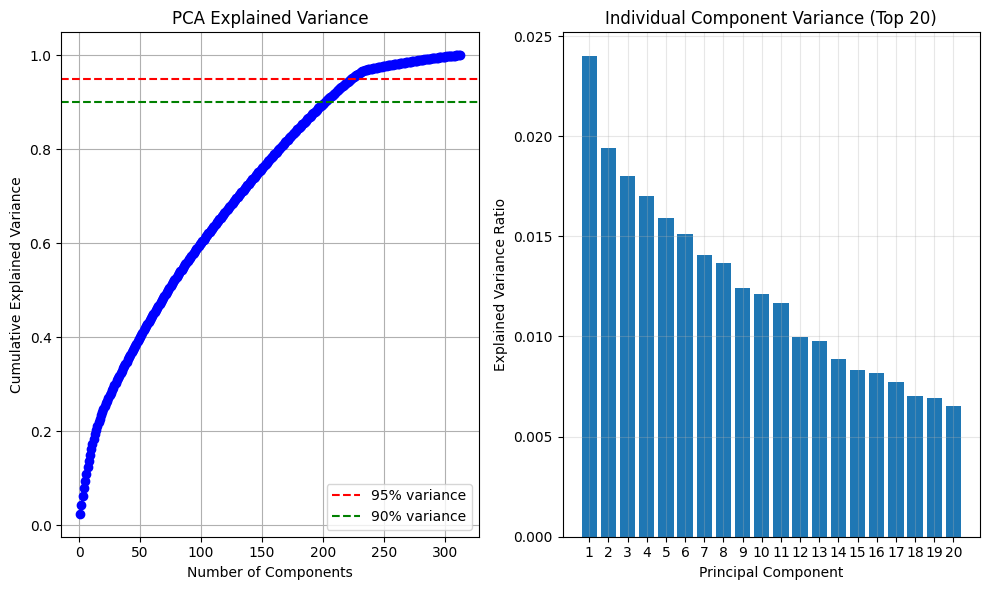

🔍 Testing PCA dengan komponen: [50, 100, 202, 224]

🔧 Testing PCA dengan 50 komponen
📊 Dimensi setelah PCA: 50
📈 Total explained variance: 0.4004

🔍 Training PCA(50) + SVM(linear)
  📊 Validation Accuracy: 0.9218

🔍 Training PCA(50) + SVM(rbf)
  📊 Validation Accuracy: 0.9826

🔍 Training PCA(50) + SVM(poly)
  📊 Validation Accuracy: 0.9744

🔍 Training PCA(50) + SVM(sigmoid)
  📊 Validation Accuracy: 0.7411

🔧 Testing PCA dengan 100 komponen
📊 Dimensi setelah PCA: 100
📈 Total explained variance: 0.6008

🔍 Training PCA(100) + SVM(linear)
  📊 Validation Accuracy: 0.9349

🔍 Training PCA(100) + SVM(rbf)
  📊 Validation Accuracy: 0.9843

🔍 Training PCA(100) + SVM(poly)
  📊 Validation Accuracy: 0.9695

🔍 Training PCA(100) + SVM(sigmoid)
  📊 Validation Accuracy: 0.8114

🔧 Testing PCA dengan 202 komponen
📊 Dimensi setelah PCA: 202
📈 Total explained variance: 0.9017

🔍 Training PCA(202) + SVM(linear)
  📊 Validation Accuracy: 0.9433

🔍 Training PCA(202) + SVM(rbf)
  📊 Validation Accuracy: 0.9841

🔍 Tr

In [ ]:
#code untuk seleksi fitur PCA non-4qmv
import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# 0. Pastikan folder models/ ada
if not os.path.exists('models'):
    os.makedirs('models')

# 1. Load dataset
df = pd.read_csv('output-baru/csv/nilai-fitur-all-filtered-anxiety.csv')

# 2. Siapkan fitur dan label
X = df.drop(columns=['Frame', 'Folder Path', 'Label']) # x: hanya fitur numerik untuk training
y = df['Label'] # y: label tingkat kecemasan

print(f" Jumlah fitur asli: {X.shape[1]}")

# 3. Encode label
label_encoder = LabelEncoder() # label tinggi, rendah, dst dikonversi menjadi angka (0,1,2,3) menggunakan LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# 4. Split data: 80% train, 10% val, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 5. Scaling fitur (WAJIB sebelum PCA)
scaler = StandardScaler() # PCA sangat sensitif terhadap skala fitur → harus distandardisasi (mean=0, std=1).
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. ========== ANALISIS PCA ==========
# Pertama, analisis berapa komponen yang optimal
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Hitung cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) # digunakan untuk melihat akumulasi variance

# Tentukan jumlah komponen untuk 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f" Komponen untuk 95% variance: {n_components_95}")

# Tentukan jumlah komponen untuk 90% variance  
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"📈 Komponen untuk 90% variance: {n_components_90}")

# Plot explained variance (opsional, bisa di-comment jika tidak perlu)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(1, min(21, len(pca_full.explained_variance_ratio_) + 1)), 
         pca_full.explained_variance_ratio_[:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Component Variance (Top 20)')
plt.xticks(range(1, min(21, len(pca_full.explained_variance_ratio_) + 1)))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. ========== TESTING BERBAGAI JUMLAH KOMPONEN PCA ==========
# Test beberapa opsi komponen PCA
pca_options = [
    n_components_90,  # 90% variance
    n_components_95,  # 95% variance
    min(50, X.shape[1]),  # Maksimal 50 komponen
    min(100, X.shape[1])  # Maksimal 100 komponen
]

# Hapus duplikat dan urutkan
pca_options = sorted(list(set(pca_options)))
print(f" Testing PCA dengan komponen: {pca_options}")

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

best_model = None
best_kernel = None
best_pca_components = None
best_accuracy = 0
best_pca = None

results = []

# 8. Loop untuk setiap kombinasi PCA + kernel
for n_components in pca_options: # untuk setiap jumlah komponen PCA, diuji kombinasi kernelnya
    print(f"\n{'='*50}")
    print(f" Testing PCA dengan {n_components} komponen")
    
    # Inisialisasi PCA
    pca = PCA(n_components=n_components)
    
    # Fit PCA pada training data dan transform semua data
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    print(f" Dimensi setelah PCA: {X_train_pca.shape[1]}")
    print(f" Total explained variance: {pca.explained_variance_ratio_.sum():.4f}")
    
    # Test setiap kernel dengan PCA ini
    for kernel in kernels:
        print(f"\n🔍 Training PCA({n_components}) + SVM({kernel})")
        
        # Train model
        model = SVC(kernel=kernel, C=1, random_state=42)
        model.fit(X_train_pca, y_train)
        
        # Evaluasi pada validasi
        y_val_pred = model.predict(X_val_pca) # setelah mendapat kombinasi terbaik PCA + SVM diuji ke data test
        report = classification_report(y_val, y_val_pred, output_dict=True, 
                                     target_names=label_encoder.classes_)
        accuracy = report['accuracy']
        
        print(f"   Validation Accuracy: {accuracy:.4f}")
        
        # Simpan hasil
        results.append({
            'pca_components': n_components,
            'kernel': kernel,
            'accuracy': accuracy,
            'explained_variance': pca.explained_variance_ratio_.sum()
        })
        
        # Update model terbaik
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_pca_components = n_components
            best_model = model
            best_pca = pca

# 9. ========== HASIL TERBAIK ==========
print(f"\n{'='*60}")
print(f" KONFIGURASI TERBAIK:")
print(f"    PCA Components: {best_pca_components}")
print(f"    SVM Kernel: {best_kernel}")
print(f"    Validation Accuracy: {best_accuracy:.4f}")
print(f"    Explained Variance: {best_pca.explained_variance_ratio_.sum():.4f}")

# Transform test data dengan PCA terbaik
X_test_pca_best = best_pca.transform(X_test_scaled)

# Evaluasi final pada test data
y_test_pred = best_model.predict(X_test_pca_best)
print(f"\n=== FINAL TEST REPORT ===")
print(f"PCA Components: {best_pca_components}, Kernel: {best_kernel}")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# 10. ========== SIMPAN MODEL DAN HASIL ==========
# Simpan model terbaik beserta PCA
joblib.dump(best_model, f'models/svm_pca_model_{best_kernel}_{best_pca_components}comp.joblib')
joblib.dump(best_pca, f'models/pca_{best_pca_components}comp.joblib')
joblib.dump(scaler, 'models/scaler.joblib')
joblib.dump(label_encoder, 'models/label_encoder.joblib')

# Simpan hasil semua eksperimen
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('accuracy', ascending=False)
results_df.to_csv('models/pca_svm_results.csv', index=False)

print(f"\n SAVED FILES:")
print(f"    Best Model: models/svm_pca_model_{best_kernel}_{best_pca_components}comp.joblib")
print(f"    Best PCA: models/pca_{best_pca_components}comp.joblib")
print(f"    Scaler: models/scaler.joblib")
print(f"    Label Encoder: models/label_encoder.joblib")
print(f"    All Results: models/pca_svm_results.csv")

# 11. ========== TAMPILKAN TOP 5 HASIL ==========
print(f"\n TOP 5 KOMBINASI TERBAIK:")
print(results_df.head().to_string(index=False))

# 12. ========== INFORMASI FITUR PENTING (untuk PCA terbaik) ==========
print(f"\n KOMPONEN PCA TERPENTING:")
feature_names = X.columns.tolist()
components_df = pd.DataFrame( # menampilkan fitur-fitur yg paling berkontribusi pada 3 komponen utama PCA
    best_pca.components_[:5],  # Top 5 komponen
    columns=feature_names,
    index=[f'PC{i+1}' for i in range(5)]
)

# Tampilkan kontribusi fitur terbesar untuk setiap komponen
for i in range(min(3, best_pca.n_components_)):  # Top 3 komponen
    print(f"\n Principal Component {i+1} (variance: {best_pca.explained_variance_ratio_[i]:.4f}):")
    pc_contributions = abs(components_df.iloc[i]).sort_values(ascending=False).head(5)
    for feature, contribution in pc_contributions.items():
        print(f"   {feature}: {contribution:.4f}")

In [ ]:
import pandas as pd # manipulasi data
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # evaluasi
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt # visualisasi
import seaborn as sns
import joblib # penyimpanan
import os

# Path ke file CSV
csv_path = "output-baru/csv/nilai-fitur-all-filtered-anxiety.csv"

print("="*60)
print("LINEAR DISCRIMINANT ANALYSIS (LDA) UNTUK SELEKSI FITUR")
print("="*60)

# Load data
print("\n1. LOADING DATA...")
try:
    df = pd.read_csv(csv_path)
    print(f" Data berhasil dimuat dengan shape: {df.shape}")
    print(f"   Kolom yang tersedia: {len(df.columns)} kolom")
except FileNotFoundError:
    print(f" File tidak ditemukan di path: {csv_path}")
    exit()

# Label sudah tersedia langsung di kolom 'Label'
print(f"\n2. DISTRIBUSI LABEL ANXIETY:")
label_counts = df['Label'].value_counts() # menampilkan jumlah sampel per label
for label, count in label_counts.items():
    print(f"   {label}: {count} sampel ({count/len(df)*100:.1f}%)")

# Encode label
label_encoder = LabelEncoder() # konversi label menjadi angka (0,1,2,dst)
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

print(f"\n3. MAPPING LABEL:")
for i, label in enumerate(label_encoder.classes_):
    encoded_value = label_encoder.transform([label])[0]
    print(f"   {label} → {encoded_value}")

# Prepare features
columns_to_drop = ['Frame', 'Folder Path', 'Label', 'Label_Encoded'] # menghapus kolom yg tdk relevan sbg fitur dan menyimpan fitur ke x dan label ke y
X = df.drop(columns=columns_to_drop)
y = df['Label_Encoded']

print(f"\n4. PERSIAPAN DATA:")
print(f"   Jumlah fitur asli: {X.shape[1]}")
print(f"   Jumlah sampel: {X.shape[0]}")
print(f"   Jumlah kelas: {len(np.unique(y))}")

# Handle missing values
if X.isnull().sum().sum() > 0:
    print(f"   Mengisi {X.isnull().sum().sum()} missing values...")
    X = X.fillna(X.median()) # jika ada nilai kosong diisi nilai tengah

# Split data 80:10:10
print(f"\n5. SPLIT DATA (80:10:10)...")
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"   Training: {X_train.shape[0]} sampel")
print(f"   Validation: {X_val.shape[0]} sampel")
print(f"   Testing: {X_test.shape[0]} sampel")

# Standarisasi fitur
print(f"\n6. STANDARISASI FITUR...")
scaler = StandardScaler() # Fitur distandarisasi agar mean = 0 dan std = 1
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("="*60)
print("LINEAR DISCRIMINANT ANALYSIS (LDA)")
print("="*60)

# LDA untuk seleksi fitur
print(f"\n7. MENERAPKAN LDA...")

# Tentukan jumlah komponen LDA (maksimal n_classes - 1)
n_classes = len(np.unique(y))
n_components = min(n_classes - 1, X_train_scaled.shape[1])

print(f"   Jumlah kelas: {n_classes}")
print(f"   Komponen LDA maksimal: {n_components}")

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=n_components) # LDA mencari kombinasi fitur yg memaksimalkan pemisahan antar kelas, dan mengurangi dimensi fitur dari ratusan jadi (n_kelas-1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test_scaled)

print(f"   Dimensi setelah LDA: {X_train_lda.shape[1]}")

# Tampilkan explained variance ratio
explained_variance = lda.explained_variance_ratio_ # menampilkan seberapa besar tiap komponen LDA menjelaskan perbedaan antar kelas
print(f"\n8. EXPLAINED VARIANCE RATIO:")
for i, var in enumerate(explained_variance):
    print(f"   LDA Component {i+1}: {var:.4f} ({var*100:.2f}%)")

cumulative_variance = np.cumsum(explained_variance)
print(f"\n   Cumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"   Component 1-{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Analisis Loading Matrix (kontribusi fitur asli terhadap komponen LDA)
print(f"\n9. KONTRIBUSI FITUR TERHADAP KOMPONEN LDA:")
feature_names = X.columns
scalings = lda.scalings_  # mengambil nilai kontribusi tiap fitur thdp komponen LDA

for comp in range(n_components):
    print(f"\n   === LDA Component {comp+1} ===")
    # Ambil kontribusi fitur untuk komponen ini
    contributions = scalings[:, comp]
    
    # Buat dataframe untuk sorting
    feature_contrib = pd.DataFrame({
        'Feature': feature_names,
        'Contribution': contributions,
        'Abs_Contribution': np.abs(contributions)
    }).sort_values('Abs_Contribution', ascending=False)
    
    # Tampilkan 10 fitur teratas
    print(f"   Top 10 fitur paling berpengaruh:")
    for idx, row in feature_contrib.head(10).iterrows():
        print(f"     {row['Feature']}: {row['Contribution']:.4f}")

print("="*60)
print("EVALUASI MODEL DENGAN DAN TANPA LDA")
print("="*60)

# Model 1: SVM dengan semua fitur asli
print(f"\n10. MODEL TANPA LDA (Semua Fitur)...")
svm_full = SVC(kernel='rbf', random_state=42) # model dilatih dengan semua fitur asli tanpa reduksi dimensi
svm_full.fit(X_train_scaled, y_train)

y_val_pred_full = svm_full.predict(X_val_scaled)
y_test_pred_full = svm_full.predict(X_test_scaled)

acc_val_full = accuracy_score(y_val, y_val_pred_full) # mengukur akurasi validasi dan testing dari kedua model
acc_test_full = accuracy_score(y_test, y_test_pred_full)

print(f"    Validation Accuracy: {acc_val_full:.4f}")
print(f"    Testing Accuracy: {acc_test_full:.4f}")

# Model 2: SVM dengan fitur LDA
print(f"\n11. MODEL DENGAN LDA ({n_components} Komponen)...")
svm_lda = SVC(kernel='rbf', random_state=42) # model dilatih dgn fitur yg sudah direduksi oleh LDA
svm_lda.fit(X_train_lda, y_train)

y_val_pred_lda = svm_lda.predict(X_val_lda)
y_test_pred_lda = svm_lda.predict(X_test_lda)

acc_val_lda = accuracy_score(y_val, y_val_pred_lda)
acc_test_lda = accuracy_score(y_test, y_test_pred_lda)

print(f"    Validation Accuracy: {acc_val_lda:.4f}")
print(f"    Testing Accuracy: {acc_test_lda:.4f}")

# Perbandingan
print(f"\n12. PERBANDINGAN HASIL:")
print(f"    {'Metode':<20} {'Fitur':<10} {'Val Acc':<10} {'Test Acc':<10}")
print(f"    {'-'*50}")
print(f"    {'Tanpa LDA':<20} {X.shape[1]:<10} {acc_val_full:<10.4f} {acc_test_full:<10.4f}")
print(f"    {'Dengan LDA':<20} {n_components:<10} {acc_val_lda:<10.4f} {acc_test_lda:<10.4f}")

improvement = acc_test_lda - acc_test_full
if improvement > 0:
    print(f"     LDA meningkatkan akurasi sebesar {improvement:.4f}")
else:
    print(f"     LDA menurunkan akurasi sebesar {abs(improvement):.4f}")

# Classification Report untuk model terbaik
if acc_test_lda >= acc_test_full: 
    best_model = "LDA"
    best_predictions = y_test_pred_lda
    best_accuracy = acc_test_lda
else:
    best_model = "Full Features"
    best_predictions = y_test_pred_full
    best_accuracy = acc_test_full

print(f"\n13. CLASSIFICATION REPORT (Model Terbaik: {best_model}):")
print(classification_report(y_test, best_predictions, 
                          target_names=label_encoder.classes_))

# Save models
print(f"\n14. MENYIMPAN MODEL...")
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Simpan model terbaik
if best_model == "LDA":
    joblib.dump(svm_lda, f"{model_dir}/svm_lda_model.joblib")
    joblib.dump(lda, f"{model_dir}/lda_transformer.joblib")
    print(f"     SVM+LDA model disimpan")
else:
    joblib.dump(svm_full, f"{model_dir}/svm_full_model.joblib")
    print(f"     SVM model (full features) disimpan")

# Simpan scaler dan encoder
joblib.dump(scaler, f"{model_dir}/scaler.joblib")
joblib.dump(label_encoder, f"{model_dir}/label_encoder.joblib")

# Simpan informasi model
model_info = {
    'best_model': best_model,
    'best_accuracy': best_accuracy,
    'feature_names': list(X.columns),
    'label_classes': list(label_encoder.classes_),
    'n_original_features': X.shape[1],
    'n_lda_components': n_components,
    'explained_variance_ratio': explained_variance.tolist(),
    'improvement': improvement
}

joblib.dump(model_info, f"{model_dir}/model_info.joblib")
print(f"     Model info disimpan")

print(f"\n" + "="*60)
print("KESIMPULAN")
print("="*60)
print(f" LDA berhasil mengurangi fitur dari {X.shape[1]} → {n_components}")
print(f" Explained variance: {cumulative_variance[-1]*100:.2f}%")
print(f" Model terbaik: {best_model} (Accuracy: {best_accuracy:.4f})")

if best_model == "LDA":
    print(f" LDA memberikan hasil yang lebih baik dengan fitur yang lebih sedikit!")
else:
    print(f"  Model full features masih lebih baik, tapi LDA tetap berguna untuk interpretasi")

print(f"\n💡 KEUNTUNGAN LDA:")
print(f"   - Mengurangi overfitting")
print(f"   - Interpretasi yang lebih mudah")
print(f"   - Komputasi lebih cepat")
print(f"   - Visualisasi yang memungkinkan")

LINEAR DISCRIMINANT ANALYSIS (LDA) UNTUK SELEKSI FITUR

1. LOADING DATA...
✅ Data berhasil dimuat dengan shape: (53455, 315)
   Kolom yang tersedia: 315 kolom

2. DISTRIBUSI LABEL ANXIETY:
   rendah: 13594 sampel (25.4%)
   tinggi: 13498 sampel (25.3%)
   sangat_rendah: 13298 sampel (24.9%)
   sangat_tinggi: 13065 sampel (24.4%)

3. MAPPING LABEL:
   rendah → 0
   sangat_rendah → 1
   sangat_tinggi → 2
   tinggi → 3

4. PERSIAPAN DATA:
   Jumlah fitur asli: 312
   Jumlah sampel: 53455
   Jumlah kelas: 4

5. SPLIT DATA (80:10:10)...
   Training: 42764 sampel
   Validation: 5345 sampel
   Testing: 5346 sampel

6. STANDARISASI FITUR...
LINEAR DISCRIMINANT ANALYSIS (LDA)

7. MENERAPKAN LDA...
   Jumlah kelas: 4
   Komponen LDA maksimal: 3
   Dimensi setelah LDA: 3

8. EXPLAINED VARIANCE RATIO:
   LDA Component 1: 0.4958 (49.58%)
   LDA Component 2: 0.2757 (27.57%)
   LDA Component 3: 0.2285 (22.85%)

   Cumulative Explained Variance:
   Component 1-1: 0.4958 (49.58%)
   Component 1-2: 0.77

In [ ]:
# Random Sampling 4QMV
from clasification.svm import SVMClassifier

# Load the dataset and initialize the classifier
# dataset_file = 'test-output/4qmv-all-component.csv'
# dataset_file = 'test-output/nilai-fitur-all-component.csv'
# dataset_file = 'output/csv/4qmv-all-component.csv'
# dataset_file = 'test-output/onsetoffset_tanpa_fear/4qmv-all-component.csv'
dataset_file = 'output-baru/csv/4qmv-all-component.csv'
label_column = 'Label'
except_feature_columns = ['Frame', 'Folder Path', 'Label']  # Columns to exclude

# Initialize the classifier
classifier = SVMClassifier(dataset_file, label_column, except_feature_column=except_feature_columns)

# Load, split, train, evaluate and save the model
classifier.load_data()
classifier.split_data(test_size=0.2)
classifier.train_model(autoParams=True)
classifier.evaluate_model()
classifier.save_model('4qmv_svm_model_kfold.joblib', '4qmv_label_encoder_kfold.joblib')

In [3]:
import os
import matplotlib.pyplot as plt
import cv2
from feature_extraction.poc import POC
from feature_extraction.vektor import Vektor
from feature_extraction.quadran import Quadran
import numpy as np

def visualize_motion_vectors(frame1_path, frameX_path, blockSize=7, output_path='motion_vector_result_tes_mouth2.jpg'):
    import matplotlib.pyplot as plt
    import cv2
    import numpy as np
    from feature_extraction.poc import POC
    from feature_extraction.vektor import Vektor
    from feature_extraction.quadran import Quadran

    frame1 = cv2.imread(frame1_path, cv2.IMREAD_GRAYSCALE)
    frameX = cv2.imread(frameX_path, cv2.IMREAD_GRAYSCALE)

    if frame1 is None or frameX is None:
        raise ValueError(f"Gagal membaca gambar: {frame1_path} atau {frameX_path}")

    if frame1.shape != frameX.shape:
        print('Terjadi Resize')
        frameX = cv2.resize(frameX, (frame1.shape[1], frame1.shape[0]))

    initPOC = POC(frame1, frameX, blockSize)
    valPOC = initPOC.getPOC()

    initQuiv = Vektor(valPOC, blockSize)
    quivData = initQuiv.getVektor()

    initQuadran = Quadran(quivData)
    quadran = initQuadran.getQuadran()

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].imshow(frame1, cmap='gray')
    axs[0].set_title('Frame 1 (Original)')
    axs[0].axis('off')

    axs[1].imshow(frameX, cmap='gray')
    axs[1].set_title('Frame X (Comparison)')
    axs[1].axis('off')

    axs[2].imshow(frame1, cmap='gray')
    axs[2].set_title('Motion Vectors + Grid')
    axs[2].axis('image')

    h, w = frame1.shape
    for x in range(0, w, blockSize):
        axs[2].axvline(x=x, color='lime', linewidth=0.5)
    for y in range(0, h, blockSize):
        axs[2].axhline(y=y, color='lime', linewidth=0.5)

    block_num = 1
    fitur_count = 0
    for row in range(0, h, blockSize):
        for col in range(0, w, blockSize):
            center_x = col + blockSize // 2
            center_y = row + blockSize // 2
            axs[2].text(center_x, center_y, str(block_num), color='yellow', fontsize=6,
                        ha='center', va='center', fontweight='bold')
            block_num += 1
            fitur_count += 1
    print(f"Total fitur yang dihasilkan: {fitur_count}")
    X, Y, U, V = [], [], [], []

    # Cetak header untuk terminal
    print("\n== Data Vektor Per Blok ==")
    print("No |   X   |   Y   | Magnitude | Theta")
    print("------------------------------------------")

    block_num = 1
    for i, quad in enumerate(quadran):
        x = int(quivData[i, 0])
        y = int(quivData[i, 1])
        x_comp = quad[1]
        y_comp = quad[2]
        magnitude = quad[3]
        theta = quad[4]

        if x_comp != 0 or y_comp != 0:
            X.append(x)
            Y.append(y)
            U.append(x_comp)
            V.append(y_comp)

        print(f"{block_num:2} | {x:5} | {y:5} | {magnitude:9.2f} | {theta:6.2f}")
        block_num += 1


        # print(f"{i+1:2} | {x:5} | {y:5} | {magnitude:9.2f} | {theta:6.2f}")

    axs[2].quiver(X, Y, U, V, color='red', scale_units='xy', scale=1, width=0.003, headwidth=7, headlength=7)

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"\nVisualisasi berhasil disimpan ke {output_path}")
    return output_path




def process_directory(ref_frame_dir, comparison_frames_dir, output_dir, blockSize=7):
    """
    Memproses direktori berisi frame referensi dan frame perbandingan
    
    Parameters:
    ref_frame_dir (str): Direktori berisi frame referensi
    comparison_frames_dir (str): Direktori berisi frame yang akan dibandingkan
    output_dir (str): Direktori untuk menyimpan hasil visualisasi
    blockSize (int): Ukuran blok untuk analisis (default: 7)
    """
    # Membuat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)
    
    # Ambil frame referensi
    ref_frames = [f for f in os.listdir(ref_frame_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    if not ref_frames:
        print(f"Tidak ada file gambar ditemukan di {ref_frame_dir}")
        return
    
    # Ambil frame pertama sebagai referensi
    ref_frame_path = os.path.join(ref_frame_dir, ref_frames[0])
    
    # Ambil semua frame perbandingan
    comparison_frames = [f for f in os.listdir(comparison_frames_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    if not comparison_frames:
        print(f"Tidak ada file gambar ditemukan di {comparison_frames_dir}")
        return
    
    # Proses setiap frame perbandingan
    for idx, frame in enumerate(comparison_frames):
        comp_frame_path = os.path.join(comparison_frames_dir, frame)
        output_path = os.path.join(output_dir, f"motion_vector_{idx+1}.jpg")
        
        try:
            visualize_motion_vectors(ref_frame_path, comp_frame_path, blockSize, output_path)
            print(f"Berhasil memproses {frame}")
        except Exception as e:
            print(f"Gagal memproses {frame}: {str(e)}")

def main():
    # Contoh penggunaan untuk satu pasang gambar
    frame1_path = 'output-baru/mouth_regions/rendah/20241209090801/mouth_img1.jpg'  # Ganti dengan path frame referensi
    frameX_path = 'output-baru/mouth_regions/rendah/20241209090801/mouth_img2.jpg'  # Ganti dengan path frame yang akan dibandingkan
    try:
        # Visualisasi satu pasang gambar
        result_path = visualize_motion_vectors(frame1_path, frameX_path, blockSize=7)
        print(f"Hasil visualisasi disimpan di: {result_path}")
        
        # Atau jika ingin memproses direktori
        # process_directory('path/to/ref_frames', 'path/to/comp_frames', 'path/to/output')
        
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

Total fitur yang dihasilkan: 50

== Data Vektor Per Blok ==
No |   X   |   Y   | Magnitude | Theta
------------------------------------------
 1 |     3 |     3 |    270.00 |   2.00
 2 |     0 |     0 |      0.00 |   0.00
 3 |     0 |     0 |      0.00 |   0.00
 4 |     0 |     0 |      0.00 |   0.00
 5 |     0 |     0 |      0.00 |   0.00
 6 |     0 |     0 |      0.00 |   0.00
 7 |     0 |     0 |      0.00 |   0.00
 8 |     0 |     0 |      0.00 |   0.00
 9 |     0 |     0 |      0.00 |   0.00
10 |    66 |     3 |    135.00 |   1.41
11 |     0 |     0 |      0.00 |   0.00
12 |     0 |     0 |      0.00 |   0.00
13 |     0 |     0 |      0.00 |   0.00
14 |     0 |     0 |      0.00 |   0.00
15 |     0 |     0 |      0.00 |   0.00
16 |     0 |     0 |      0.00 |   0.00
17 |     0 |     0 |      0.00 |   0.00
18 |     0 |     0 |      0.00 |   0.00
19 |     0 |     0 |      0.00 |   0.00
20 |     0 |     0 |      0.00 |   0.00
21 |     0 |     0 |      0.00 |   0.00
22 |     0 |     0